256    977182.154059
257    978040.859862
258    978165.903829
259    979056.791575
260    979109.827904
261    979138.884119
262    979694.124790
263    979828.189045
264    979945.988647
265    980055.398595
266    980156.627298
267    980279.443071
268    980400.529889
269    980525.291692
270    980630.063408
271    980707.457190
272    987930.106967
273    980825.802737
274    980887.481443
275    980916.054049
276    980941.686897
277    981383.431621
278    982943.644259
279    982954.397887
Name: predicted_mean, dtype: float64


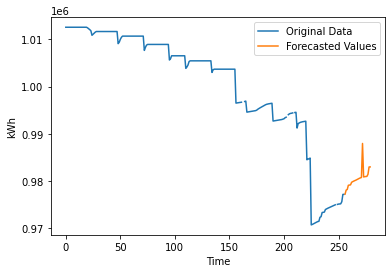

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data into a DataFrame
data=pd.read_excel("April Month data.xlsx")

#Fill all zero values in column with average of column
df['IR']=df['IR'].replace(0,df['IR'].mean())
df['IY']=df['IY'].replace(0,df['IY'].mean())
df['IB']=df['IB'].replace(0,df['IB'].mean())
df['kVarh']=df['kVarh'].replace(0,df['kVarh'].mean())

# Convert the 'rtimeid' column to datetime
data['rtimeid'] = pd.to_datetime(data['rtimeid'])

data = pd.DataFrame(data)

# Set 'rtimeid' as the index
#data.set_index('rtimeid', inplace=True)

# Extract the 'kWh' column as the time series data
ts = data['kWh']

# Define the SARIMA model
order = (1, 1, 1)  # (p, d, q) order
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S) seasonal order
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)

# Fit the model to the data
model_fit = model.fit()

# Forecast the next 24 time steps
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(forecast)

# Visualize the original data and the forecasted values
plt.plot(ts, label='Original Data')
plt.plot(forecast, label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('kWh')
plt.legend()
plt.show()


In [3]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

df = pd.read_excel("April Month data.xlsx", parse_dates=['rtimeid'], index_col='rtimeid')

train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

order = (p, d, q)  # specify the order of the SARIMA model
seasonal_order = (P, D, Q, m)  # specify the seasonal order of the SARIMA model
model = SARIMAX(train_data['kWh'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

mse = mean_squared_error(test_data['kWh'], predictions)
print('Mean Squared Error:', mse)



NameError: name 'p' is not defined